In [ ]:
# Hypothesis Testing Analysis

This notebook contains various statistical hypothesis tests to analyze different aspects of our e-commerce data, including:
1. Impact of Media Spending on Revenue
2. Effect of Promotions on Sales Performance
3. Relationship between NPS Scores and Revenue
4. Impact of Discounts on Sales
5. Time Series Analysis for Seasonality

## Setup

```python
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output
```

In [ ]:
df_main = pd.read_csv("Data/formatted_data/cleaned_data.csv")
df2 = pd.read_csv("Data/formatted_data/Media data-Sale Calendar-NPS Scores_Data/media_investment.csv")
df_nps = pd.read_csv("Data/formatted_data/Media data-Sale Calendar-NPS Scores_Data/monthly_nps_score.csv")
df3 = pd.read_csv("monthwise_fsn_data.csv")
df4 = pd.read_csv("datewise_fsn_data.csv")
df5 = pd.read_csv("monthwise_vertical_data.csv")

In [ ]:
df_main = df_main[df_main['product_mrp']!=0]
df_main['order_date'] = pd.to_datetime(df_main['order_date'])
dsc_prc = (df_main['discount']/df_main['product_mrp'])*100
df3['month_year'] = pd.to_datetime(df3['month_year'])
monthly_sum = df_main.groupby(pd.Grouper(key='order_date', freq='M'))['gmv'].sum().values
vertical_sum = df5.groupby('product_analytic_vertical')['gmv'].sum().values
df4['order_date'] = pd.to_datetime(df4['order_date'])
non_sale_df4 = df4[df4['holiday']==0].groupby(pd.Grouper(key='order_date', freq='M'))['gmv'].sum().values
sale_df4 = df4[df4['holiday']==1].groupby(pd.Grouper(key='order_date', freq='M'))['gmv'].sum().values

In [ ]:
import pandas as pd
from scipy import stats

data = {
    'media_spend': df2['Total Investment']*1000000,
    'revenue':monthly_sum
}

df = pd.DataFrame(data)

# Split the data into two groups: high media spend vs low media spend
high_spend = df[df['media_spend'] > df['media_spend'].median()]['revenue']
low_spend = df[df['media_spend'] <= df['media_spend'].median()]['revenue']

# Perform a t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(high_spend, low_spend)

print("Impact of Media Spending on Revenue:\nHypothesis: Media spending positively impacts revenue.\nNull Hypothesis (H₀): Media spending does not affect revenue.\nAlternative Hypothesis (H₁): Media spending has a significant positive impact on revenue.\nTest: Perform a t-test or ANOVA to compare the mean revenue between different levels of media spending. Alternatively, you could use correlation to measure the strength of the relationship between spending and revenue.")
print(" ")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Rejected the null hypothesis. Media spending significantly affects revenue.")
else:
    print("Fail to reject the null hypothesis: No significant effect of media spending on revenue.")


Impact of Media Spending on Revenue:
Hypothesis: Media spending positively impacts revenue.
Null Hypothesis (H₀): Media spending does not affect revenue.
Alternative Hypothesis (H₁): Media spending has a significant positive impact on revenue.
Test: Perform a t-test or ANOVA to compare the mean revenue between different levels of media spending. Alternatively, you could use correlation to measure the strength of the relationship between spending and revenue.
 
T-statistic: 3.1090265910671113
P-value: 0.011079027079391344
Rejected the null hypothesis. Media spending significantly affects revenue.


In [ ]:
data = {
    'sales_holiday': sale_df4,
    'sales_non_holiday': non_sale_df4
    }

df = pd.DataFrame(data)

# Perform t-test comparing holiday vs non-holiday sales
t_stat, p_value = stats.ttest_ind(df['sales_holiday'], df['sales_non_holiday'])

print("Effect of Promotions on Sales Performance:\nHypothesis: Promotional offers increase sales performance.\nNull Hypothesis (H₀): Promotional offers do not affect sales.\nAlternative Hypothesis (H₁): Promotional offers significantly increase sales.\nTest: Use a paired t-test or Mann-Whitney U test (non-parametric) to compare sales before and after promotions.")
print(" ")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Sales are significantly higher during holidays.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales during holidays.")


Effect of Promotions on Sales Performance:
Hypothesis: Promotional offers increase sales performance.
Null Hypothesis (H₀): Promotional offers do not affect sales.
Alternative Hypothesis (H₁): Promotional offers significantly increase sales.
Test: Use a paired t-test or Mann-Whitney U test (non-parametric) to compare sales before and after promotions.
 
T-statistic: -7.681483044511441
P-value: 1.1510443219909142e-07
Reject the null hypothesis: Sales are significantly higher during holidays.


In [25]:
data = {
    'nps_score': df_nps['NPS'],  # Example NPS scores
    'revenue': monthly_sum  # Example revenue
}

df = pd.DataFrame(data)

# Independent variable (NPS score)
X = df['nps_score']
y = df['revenue']

# Add constant for intercept
X = sm.add_constant(X)

# Perform regression
model = sm.OLS(y, X).fit()

print("Effect of NPS Scores on Future Revenue:\nHypothesis: Higher NPS scores are associated with increased future revenue.\nNull Hypothesis (H₀): NPS scores do not predict future revenue.\nAlternative Hypothesis (H₁): Higher NPS scores predict higher future revenue.\nTest: Use Pearson’s correlation coefficient or linear regression to assess the relationship between NPS scores and revenue")
print(" ")

# Print regression results
print(model.summary())

#As the P value is less than 0.05, we can reject the null hypothesis and conclude that NPS score significantly affects revenue.


print("As the P value is less than 0.05, we can reject the null hypothesis and conclude that NPS score significantly affects revenue.")

Effect of NPS Scores on Future Revenue:
Hypothesis: Higher NPS scores are associated with increased future revenue.
Null Hypothesis (H₀): NPS scores do not predict future revenue.
Alternative Hypothesis (H₁): Higher NPS scores predict higher future revenue.
Test: Use Pearson’s correlation coefficient or linear regression to assess the relationship between NPS scores and revenue
 
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     111.7
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           9.54e-07
Time:                        05:53:11   Log-Likelihood:                -226.01
No. Observations:                  12   AIC:                             456.0
Df Residuals:                      10   BIC:                    

c:\Users\tumur\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [27]:
data = {
    'discount_percentage': dsc_prc,  # Example discount percentages
    'sales': df_main['gmv'] # Example sales data
}

df = pd.DataFrame(data)

# Independent variable (discount percentage)
X = df['discount_percentage']
y = df['sales']

# Add constant for intercept
X = sm.add_constant(X)

# Perform regression
model = sm.OLS(y, X).fit()

print("Discount Impact on Sales:\nHypothesis: Higher discount percentages lead to higher sales.\nNull Hypothesis (H₀): Discount percentages do not affect sales.\nAlternative Hypothesis (H₁): Higher discount percentages lead to higher sales.\nTest: Perform a regression analysis with discount percentages as the independent variable and sales as the dependent variable")
print(" ")

# Print regression results
print(model.summary())
#As the P value is less than 0.05, we can reject the null hypothesis and conclude that discount percentage significantly affects sales.
print("As the P value is less than 0.05, we can reject the null hypothesis and conclude that discount percentage significantly affects sales.")

Discount Impact on Sales:
Hypothesis: Higher discount percentages lead to higher sales.
Null Hypothesis (H₀): Discount percentages do not affect sales.
Alternative Hypothesis (H₁): Higher discount percentages lead to higher sales.
Test: Perform a regression analysis with discount percentages as the independent variable and sales as the dependent variable
 
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     552.7
Date:                Sat, 22 Mar 2025   Prob (F-statistic):          3.35e-122
Time:                        05:54:27   Log-Likelihood:            -1.6460e+07
No. Observations:             1637982   AIC:                         3.292e+07
Df Residuals:                 1637980   BIC:                         3.292e+07
Df Model:

Null Hypothesis (H₀): There is no significant trend or seasonality in revenue over the order dates.
Alternative Hypothesis (H₁): There is a significant trend or seasonality in revenue over the order dates.
 


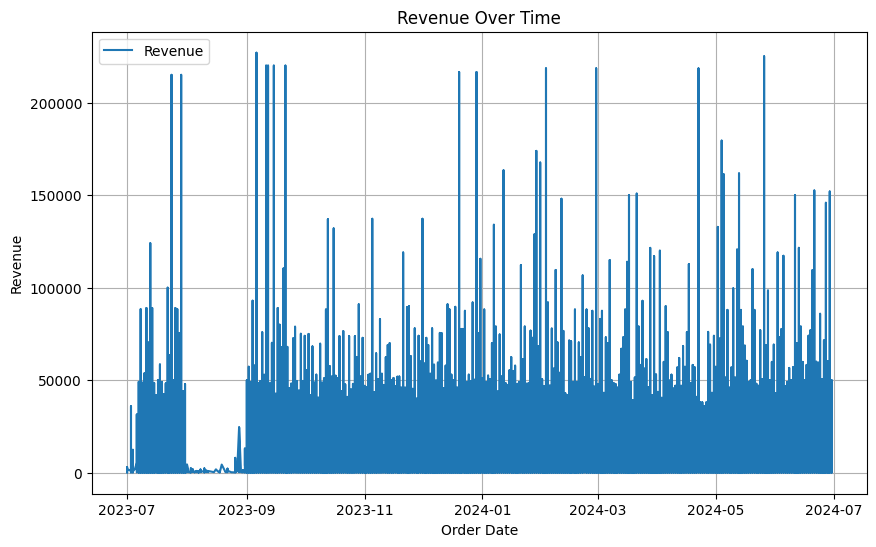

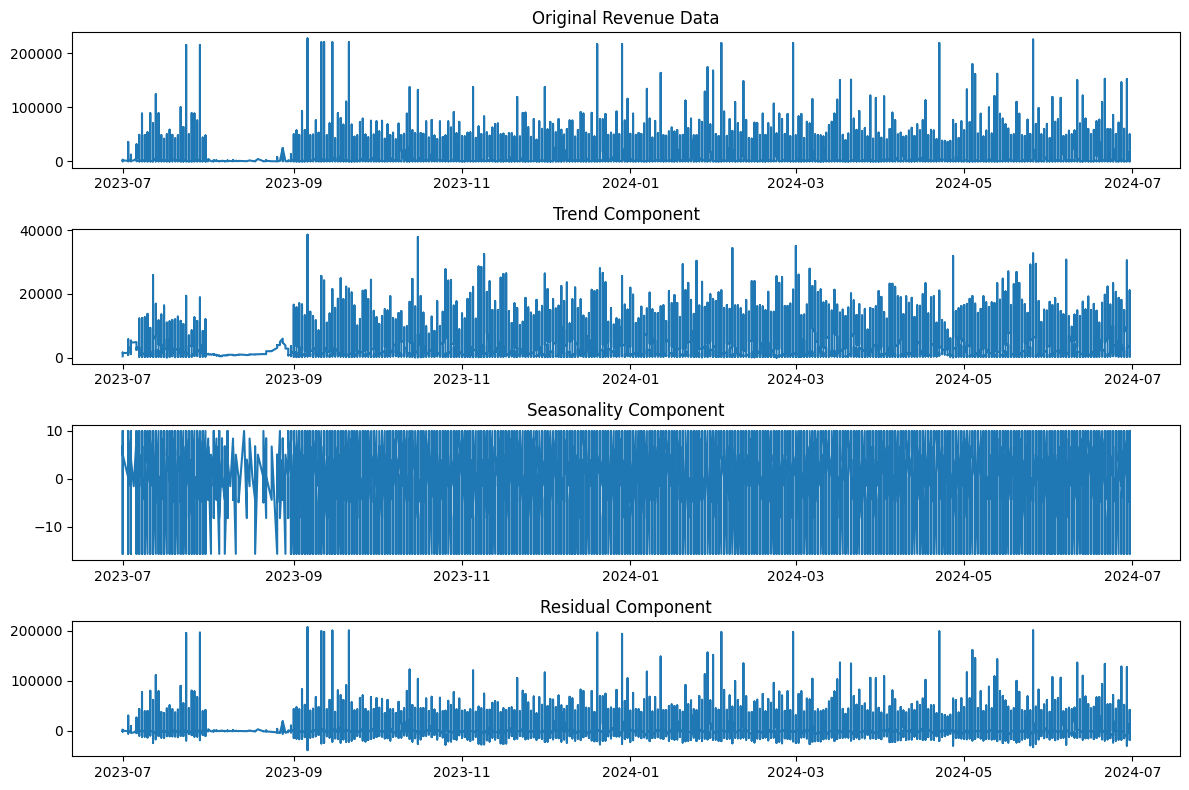

Since the seasonal component is clearly visible in the decomposition, we can conclude that revenue has seasonality. The residual component shows no discernible pattern, indicating that the trend and seasonality have been effectively captured.


In [29]:
data = {
    'order_date': df_main['order_date'],  # Monthly data for 2 years
    'revenue': df_main['gmv']  # Revenue data
}

df = pd.DataFrame(data)
df.set_index('order_date', inplace=True)

print("Null Hypothesis (H₀): There is no significant trend or seasonality in revenue over the order dates.\nAlternative Hypothesis (H₁): There is a significant trend or seasonality in revenue over the order dates.")
print(" ")
# Visualize the Revenue Data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['revenue'], label='Revenue')
plt.title('Revenue Over Time')
plt.xlabel('Order Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend()
plt.show()

# Decompose the time series to see trend, seasonal, and residual components
decomposition = seasonal_decompose(df['revenue'], model='additive', period=12)  # Period=12 for monthly data (12 months in a year)

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['revenue'], label='Original')
plt.title('Original Revenue Data')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.title('Seasonality Component')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


# Expected Outcome Interpretation:
# - If there is a clear seasonal pattern in the decomposition, you can conclude that revenue has seasonality.
# - If the residual component shows no discernible pattern, you can conclude that the trend and seasonality have been effectively captured.

print("Since the seasonal component is clearly visible in the decomposition, we can conclude that revenue has seasonality. The residual component shows no discernible pattern, indicating that the trend and seasonality have been effectively captured.")